<a href="https://colab.research.google.com/github/phystopia/pyromat-thermodynamics/blob/main/cycle_heat_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Heat Engine Cycle

Carbon dioxide gas $(CO_2)$ contained within a piston–cylinder assembly undergoes three processes in series: <br>
- **Process 1➛2:** isothermal expansion $\left( P \cdot \upsilon = \mathrm{constant} \right)$, from $P_1 = 1000 \, \mathrm{kPa} $ and $ \upsilon_1 = 0,05667 \, \mathrm{^{m^3}/_{kg}}$, to $\upsilon_2 = 0,07556 \, \mathrm{^{m^3} / _{kg}}$. <br>
- **Process 2➛3:** isobaric compression  at $P = P_2$ from $\upsilon_2$ until $\upsilon_3 = \upsilon_1$. <br>
- **Proceso 3➛1:** isochoric pressurization $(\upsilon = \upsilon_1)$ from $P_3 = P_2$ to $P_1$ .

## Gas Data and Initial Values of the Problem

**Gas constant**

In [ ]:
R_co2 = 0.1889

**Specific heat @ constant volume**

In [ ]:
cv_co2 = 0.657

**Initial Values:** <br>
The given data are the initial pressure $(P_1)$ and specific volume $(\upsilon_1)$, as well as the specific volume at state 2 $(\upsilon_2)$. <br>


In [ ]:
P1 = 1000 # kPa
print('P1:', P1,'kPa')

P1: 1000 kPa


In [ ]:
v1 = 0.05667 # m³/kg
print('v1:', v1,'m³/kg')

v1: 0.05667 m³/kg


In [ ]:
v2 = 0.07556 # m³/kg
print('v2:', v2,'m³/kg')

v2: 0.07556 m³/kg


## States

### State 1

The only unknown property of state 1 is temperature that can be found through:

$$ P_1 \, \upsilon_1 = R_{_{CO_2}} \, T $$ <br>
$$ T = \frac{P_1 \, \upsilon_1}{R_{_{CO_2}}} $$

In [ ]:
T1 = P1 * v1 / R_co2
print('T1:', np.round(T1,2),'K')

T1: 300.0 K


### State 2

Here, is necessary to find both $P_2$ and the temperature at which the process *1➛2* ocurrs.

$$ P_1 \, \upsilon_1 = P_2 \, \upsilon_2 $$ <br>
$$ P_2 = P_1 \, \frac{\upsilon_1}{\upsilon_2} $$

In [ ]:
P2 = P1 * v1 / v2 # kPa
print('P2:', P2,'kPa')

P2: 750.0 kPa


$$ T_2 = T_1 $$

In [ ]:
T2 = T1
print('T2:', np.round(T2,2),'K')

T2: 300.0 K


### State 3

In [ ]:
P3 = P2
print('P3:', P3,'kPa')

P3: 750.0 kPa


In [ ]:
v3 = v1
print('v3:', v3,'m³/kg')

v3: 0.05667 m³/kg


$$ T_3 = \frac{P_3 \, \upsilon_3}{R_{_{CO_2}}} $$

In [ ]:
T3 = P3 * v3 / R_co2
print('T3:', np.round(T3,1),'K')

T3: 225.0 K


## Processes

### Process *1* $\rightarrow$ *2*: Isothermal expansion

**Specific work:**

$$ w_{_{1 \rightarrow 2}} = R_{_{CO_2}} \, T_1 \, \ln \left( \frac{\upsilon_2}{\upsilon_1} \right) $$

In [ ]:
w12 = R_co2 * T1 * np.log(v2/v1)
print('w12:', np.round(w12,3), 'kJ/kg')

w12: 16.303 kJ/kg


**Specific internal energy:**

$$ \Delta u_{_{1 \rightarrow 2}} = c_{v_{CO_2}} \, \left( T_2 - T_1 \right) $$

In [ ]:
u12 = cv_co2 * (T2 - T1)
print('u12:', np.round(u12,3), 'kJ/kg')

u12: 0.0 kJ/kg


**First Law of Thermodynamics**

$$ q - w = \Delta u $$ <br>

From the First Law of Thermodynamics, **specific heat** can be found as:

$$ q_{_{1 \rightarrow 2}} = \Delta u_{_{1 \rightarrow 2}} + w_{_{1 \rightarrow 2}} $$

In [ ]:
q12 = u12 + w12
print('q12:', np.round(q12,3), 'kJ/kg')

q12: 16.303 kJ/kg


### Process *2* $\rightarrow$ *3*: Isobaric compression

**Specific work**

$$ w_{_{2 \rightarrow 3}} = P_2 \, \left( \upsilon_3 - \upsilon_2 \right) $$

In [ ]:
w23 = P2 * (v3 - v2)
print('w23:', np.round(w23,3), 'kJ/kg')

w23: -14.168 kJ/kg


**Specific internal energy:**

$$ u_{_{2 \rightarrow 3}} = c_{v_{CO_2}} \, \left( T_3 - T_2 \right) $$

In [ ]:
u23 = cv_co2 * (T3 - T2)
print('u23:', np.round(u23,3), 'kJ/kg')

u23: -49.275 kJ/kg


**Specific heat:**

$$ q_{_{2 \rightarrow 3}} = \Delta u_{_{2 \rightarrow 3}} + w_{_{2 \rightarrow 3}} $$

In [ ]:
q23 = u23 + w23
print('q23:', np.round(q23,3), 'kJ/kg')

q23: -63.443 kJ/kg


### Process *3* $\rightarrow$ *1*: Isochoric pressurization

**Specific work:**

$$ w_{_{3 \rightarrow 1}} = 0 $$

In [ ]:
w31 = 0
print('w31:', np.round(w31,3), 'kJ/kg')

w31: 0 kJ/kg


**Change in specific internal energy:**

$$ u_{_{3 \rightarrow 1}} = c_{v_{CO_2}} \, \left( T_1 - T_3 \right) $$

In [ ]:
u31 = cv_co2 * (T1 - T3)
print('u31:', np.round(u31,3), 'kJ/kg')

u31: 49.275 kJ/kg


**Specific heat:**

$$ q_{_{1 \rightarrow 1}} = \Delta u_{_{3 \rightarrow 1}} + w_{_{3 \rightarrow 1}} $$

In [ ]:
q31 = u31 + w31
print('q31:', np.round(q31,3), 'kJ/kg')

q31: 49.275 kJ/kg


## P-$\upsilon$ Diagram

In [ ]:
points = 100

In [ ]:
v = np.linspace(v1, v2, points)
# print('specific volume:', v, 'm³/kg')

In [ ]:
P12 = R_co2 * T1 / v
# print('Pressure:', np.round(P12,2), 'kPa')

In [ ]:
P23 = P3 * np.power(v,0)
# print('Pressure:', np.round(P23,2), 'kPa')

In [ ]:
v23 = v3 * np.power(P12,0)
# print('specific volume:', v23, 'm³/kg')

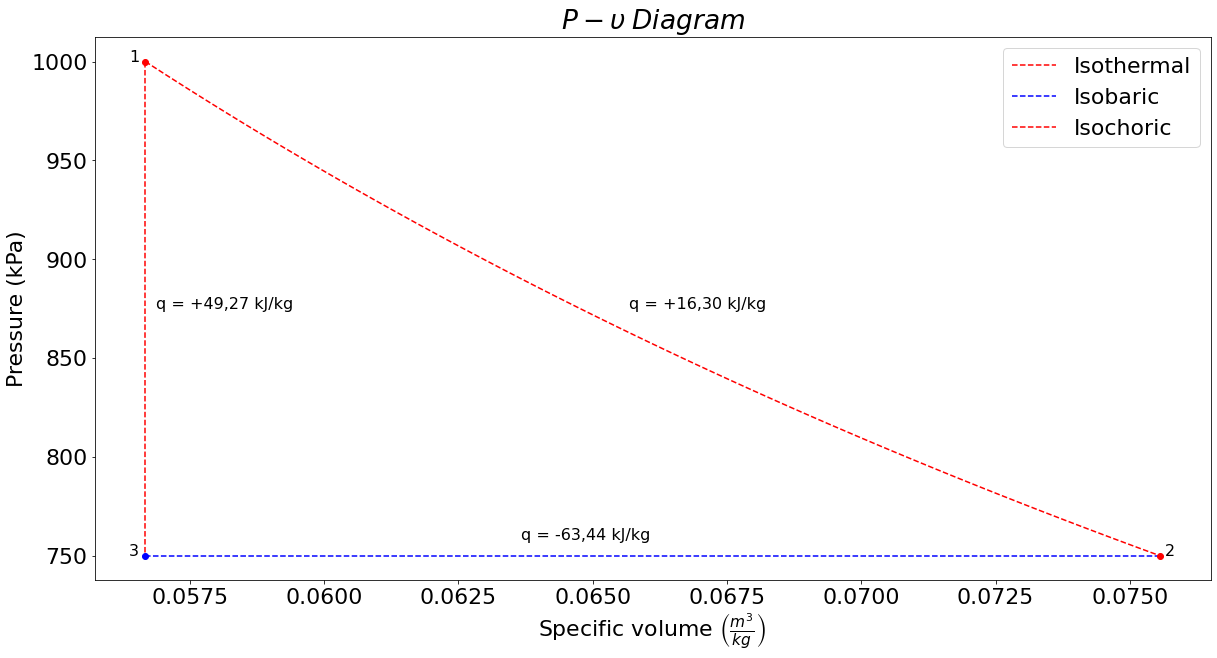

In [ ]:
font = {'family' : 'Helvetica',
        'size'   : 22}

fig, ax = plt.subplots(figsize=(20,10))

plt.title(r'$P - \upsilon \; Diagram$')
plt.rc('font', **font)

plt.plot(  v,P12,'r--', linewidth = 1.5, label = 'Isothermal')
plt.plot(  v,P23,'b--', linewidth = 1.5, label = 'Isobaric')
plt.plot(v23,P12,'r--', linewidth = 1.5, label = 'Isochoric')

plt.plot(v1,P1,'ro')
plt.plot(v2,P2,'ro')
plt.plot(v3,P3,'bo')

ax.text(v1 - 0.0003, P1, 1, size=16)
ax.text(v2 + 0.0001, P2, 2, size=16)
ax.text(v3 - 0.0003, P3, 3, size=16)

ax.text(v1 + 0.009 , P1 + (P2-P1)/2, 'q = +16,30 kJ/kg', size=16) # 1-2
ax.text(v1 + 0.007 , P2 + 8        , 'q = -63,44 kJ/kg', size=16) # 2-3
ax.text(v1 + 0.0002, P1 + (P2-P1)/2, 'q = +49,27 kJ/kg', size=16) # 3-1

plt.ylabel(r'Pressure (kPa)')
plt.xlabel(r'Specific volume $\left( \frac{m^3}{kg} \right)$')

plt.legend()
plt.show()

## Cycle

### Energy Balance

|      Process      |     w (kJ/kg)        |     $\Delta$u (kJ/kg)       |      q (kJ/kg)       |
| ----------------- | -------------------- | --------------------------- | -------------------- |
| 1 $\rightarrow$ 2 |       16,30          |            0,00             |       16,30          |
| 2 $\rightarrow$ 3 |      -14,17          |          -49,27             |      -63,44          |
| 3 $\rightarrow$ 1 |        0,0           |           49,27             |       49,27          |
|     **Cycle**     |        2,13          |            0,00             |        2,13          |

### Net specific work

$$ w_{net} = \sum w $$

In [ ]:
w_net = w12 + w23 + w31
print('w_net:', np.round(w_net,3), 'kJ/kg')

w_net: 2.135 kJ/kg


### Heat Taken from the Source (Hot Reservoir)

$$ q_{in} =  q_{_{1 \rightarrow 2}} + q_{_{3 \rightarrow 1}} $$

In [ ]:
q_in = q12 + q31
print('q_in:', np.round(q_in,3), 'kJ/kg')

q_in: 65.578 kJ/kg


### Heat Rejected to the Sink (Cold Reservoir)

$$ q_{out} = q_{_{2 \rightarrow 3}} $$

In [ ]:
q_out = q23
print('q_out:', np.round(q_out,3), 'kJ/kg')

q_out: -63.443 kJ/kg


### Thermodynamic Efficiency

$$ \eta = \frac{\mathrm{Desired} \; \mathrm{Output}}{\mathrm{Required} \; \mathrm{Input}} \; \rightarrow \; \eta = \frac{w_{net}}{q_{in}} $$

In [ ]:
eta = w_net / q_in
print("𝝶 =", np.round(eta,3))

𝝶 = 0.033


That can be calculated otherwise as:

$$ \eta = \frac{w_{net}}{q_{in}} = \frac{q_{in} - \mid q_{out} \mid}{q_{in}}= 1 - \frac{\mid q_{out} \mid}{q_{in}}$$

In [ ]:
eta_2 = 1 - np.abs(q_out/q_in)
print("𝝶 =", np.round(eta_2,3))

𝝶 = 0.033


### Temperature of the Hot Reservoir (maximum temperature in the cycle)

$$ T_H = T_1 $$

In [ ]:
TH = T1
print("TH =", np.round(TH,1), "K")

TH = 300.0 K


### Temperature of the Cold Reservoir (minimum temperature in the cycle)

$$ T_C = T_3 $$

In [ ]:
TC = T3
print("TC =", np.round(TC,1), "K")

TC = 225.0 K


### Reversible (Carnot) Efficiency

$$ \eta_{rev} = 1 - \frac{T_C}{T_H} $$

In [ ]:
eta_rev = 1 - (TC / TH)
print("𝝶_rev =", np.round(eta_rev,2))

𝝶_rev = 0.25
